# <u>TP SERIES TEMPORELLES  :</u>

A rendre avant le 26 à 23h59

#

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
import numpy as np

In [142]:
from scipy import signal

### -I -  Données “Syndromes grippaux” -

1) Importez les données du fichier Openhealth_S-Grippal.csv. Consultez http://www.openhealth.
fr/ias pour plus d’information sur les données. Affichez les 5 premières lignes du jeu de données.

In [45]:
df_openhealth_data = pd.read_csv('OpenhealthS-Grippal.csv', sep=";")

In [21]:
df_openhealth_data.describe()

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles
count,1752,1752,1752,1734
unique,1752,586,482,118
top,2014-03-01,"0,6","0,7","0,6"
freq,1,54,59,126


In [25]:
#Type de données
df_openhealth_data.dtypes

PERIODE                  object
IAS_brut                 object
IAS_lisse                object
Incidence_Sentinelles    object
dtype: object

In [8]:
df_openhealth_data.head()

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles
0,2009-07-01,"1,7","2,2","2,3"
1,2009-07-02,"3,4","2,1","2,3"
2,2009-07-03,"2,1","2,1","2,3"
3,2009-07-04,"1,3",2,"2,3"
4,2009-07-05,"14,2",2,"2,3"


#### Pour la suite, nous allons convertir les données en float


In [57]:
def convert_to_float(string):
    
    if type(string) != float :
        return float(string.replace(",", "."))
    else :
        return string

In [59]:
df_openhealth_data['IAS_brut'] = df_openhealth_data['IAS_brut'].apply(convert_to_float)
df_openhealth_data['IAS_lisse'] = df_openhealth_data['IAS_lisse'].apply(convert_to_float)
df_openhealth_data['Incidence_Sentinelles'] = df_openhealth_data['Incidence_Sentinelles'].apply(convert_to_float)

In [112]:
# On convertit la colonne PERIODE en datetime
df_openhealth_data['PERIODE'] = pd.to_datetime(df_openhealth_data['PERIODE'])

In [166]:
#On définit la colonne PERIODE comme index du dataframe
df_openhealth_data = df_openhealth_data.set_index('PERIODE')

In [48]:
type(df_openhealth_data['IAS_brut'][0])

numpy.float64

In [49]:
type(df_openhealth_data['IAS_lisse'][0])

numpy.float64

In [60]:
type(df_openhealth_data['Incidence_Sentinelles'][0])

numpy.float64

In [113]:
df_openhealth_data.head()

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles
0,2009-07-01,1.7,2.2,2.3
1,2009-07-02,3.4,2.1,2.3
2,2009-07-03,2.1,2.1,2.3
3,2009-07-04,1.3,2.0,2.3
4,2009-07-05,14.2,2.0,2.3


On va travailler seulement avec la variable IAS_brut, sous la forme d’une série temporelle, dont
on précisera la fréquence d’échantillonage et les dates de début et de fin. Pour cette variable, dans
ce jeu de données, les cas de nullité correspondent à des données manquantes. Combiende données
manquantes comporte-t-elle ? 

In [91]:
missing_data.index

Int64Index([340, 378, 627, 732, 858, 1062, 1075, 1502], dtype='int64')

In [62]:
missing_data = df_openhealth_data[df_openhealth_data['IAS_brut'] == 0 ]
print(" Nombre de valeurs non observées : {} ".format(len(missing_data)))
missing_data

 Nombre de valeurs non observées : 8 


,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles
340,2010-06-06,0.0,0.8,1.4
378,2010-07-14,0.0,0.7,0.3
627,2011-03-20,0.0,2.4,3.3
732,2011-07-03,0.0,0.8,0.3
858,2011-11-06,0.0,2.6,3.1
1062,2012-05-28,0.0,0.9,1.3
1075,2012-06-10,0.0,1.6,0.6
1502,2013-08-11,0.0,0.5,1.0


Pour les traitements des questions suivantes, éliminez les données
manquantes par imputation, c’est-à-dire en déduisant une valeur plus “raisonnable” aux dates nonobservées à partir des valeurs aux dates observées : par exemple par la moyenne de deux dates les
plus proches.

In [88]:
def replace_null_values(df_IAS_brut):
    
    for ind in df_IAS_brut[df_IAS_brut == 0].index :
        df_IAS_brut[ind] = (df_IAS_brut[ind-1] + df_IAS_brut[ind+1]) / 2

In [93]:
a = df_openhealth_data.apply(replace_null_values)

In [94]:
#test
df_openhealth_data.iloc[missing_data.index]

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles
340,2010-06-06,0.80,0.8,1.4
378,2010-07-14,0.75,0.7,0.3
627,2011-03-20,2.15,2.4,3.3
732,2011-07-03,0.55,0.8,0.3
858,2011-11-06,2.75,2.6,3.1
1062,2012-05-28,6.10,0.9,1.3
1075,2012-06-10,1.75,1.6,0.6
1502,2013-08-11,0.55,0.5,1.0


Les valeurs nulles ont bien été remplacées par imputaion.

#

#### 2) Tracez la série temporelle considérée en fonction du temps. Commentez brièvement ce que vous observez.


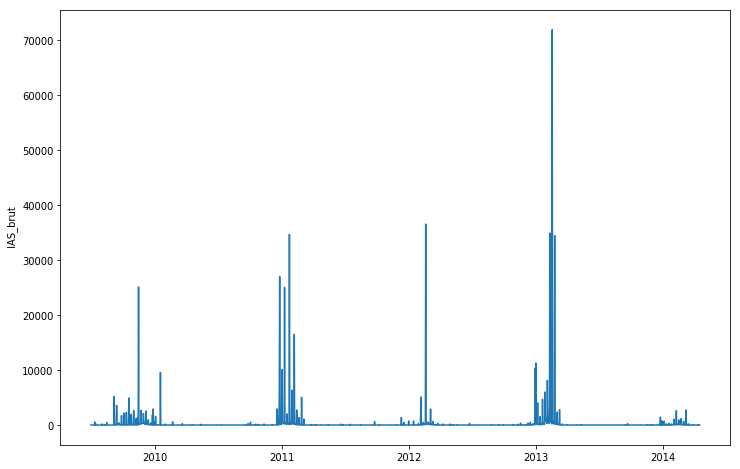

In [114]:
plt.figure(figsize=(12, 8))
plt.plot(df_openhealth_data['PERIODE'].values, df_openhealth_data['IAS_brut'].values)
plt.ylabel(' IAS_brut')
plt.show()

<u><b>Description :</b></u> On observe vaguement une sorte de répétition dans le comportement des données au fil du temps. Elles décrivent suivant une certaine période des distributions gaussiennes avec une légère variation en fonction des périodes d'environ 1 an.

#

### 3) Tracez l’histogramme de la loi marginale. Quel impact la distribution observée par l’histogramme a sur la trajectoire représentée à la question précédente ?

In [134]:
n_bins = 30

(array([1.716e+03, 1.400e+01, 6.000e+00, 4.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e-01, 2.39515667e+03, 4.79021333e+03, 7.18527000e+03,
        9.58032667e+03, 1.19753833e+04, 1.43704400e+04, 1.67654967e+04,
        1.91605533e+04, 2.15556100e+04, 2.39506667e+04, 2.63457233e+04,
        2.87407800e+04, 3.11358367e+04, 3.35308933e+04, 3.59259500e+04,
        3.83210067e+04, 4.07160633e+04, 4.31111200e+04, 4.55061767e+04,
        4.79012333e+04, 5.02962900e+04, 5.26913467e+04, 5.50864033e+04,
        5.74814600e+04, 5.98765167e+04, 6.22715733e+04, 6.46666300e+04,
        6.70616867e+04, 6.94567433e+04, 7.18518000e+04]),
 <a list of 30 Patch objects>)

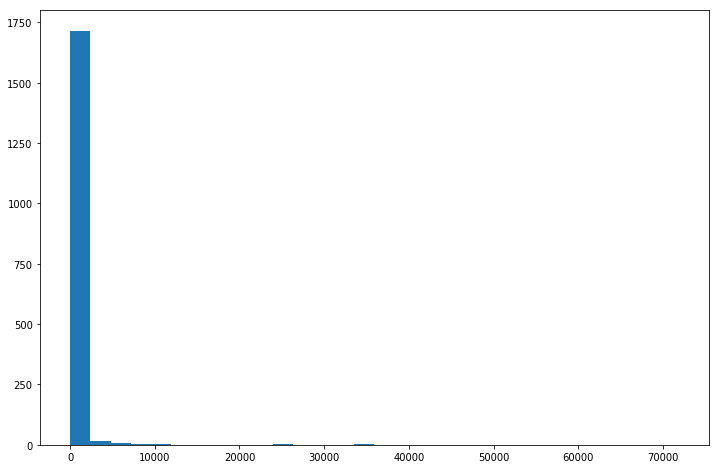

In [159]:
plt.figure(figsize=(12, 8))
plt.hist(df_openhealth_data['IAS_brut'], bins = n_bins)

<u><b>Commentaire:</b></u> On constate que les valeurs sont presque toutes très faibles, très proches de 0.

#

### 4) Reprenez les questions précédentes après tranformations des observations par le logarithme naturel.Commentez.

In [167]:
log_IAS_brut = np.log(df_openhealth_data['IAS_brut'].values)

(array([  9.,  15.,  31., 132., 130., 167., 219., 158., 155., 121.,  90.,
         76.,  76.,  63.,  52.,  54.,  51.,  39.,  24.,  25.,  14.,   8.,
         18.,   3.,   6.,   7.,   1.,   3.,   4.,   1.]),
 array([-2.30258509, -1.85308689, -1.40358869, -0.95409049, -0.50459229,
        -0.05509409,  0.39440411,  0.84390232,  1.29340052,  1.74289872,
         2.19239692,  2.64189512,  3.09139332,  3.54089152,  3.99038972,
         4.43988793,  4.88938613,  5.33888433,  5.78838253,  6.23788073,
         6.68737893,  7.13687713,  7.58637533,  8.03587353,  8.48537174,
         8.93486994,  9.38436814,  9.83386634, 10.28336454, 10.73286274,
        11.18236094]),
 <a list of 30 Patch objects>)

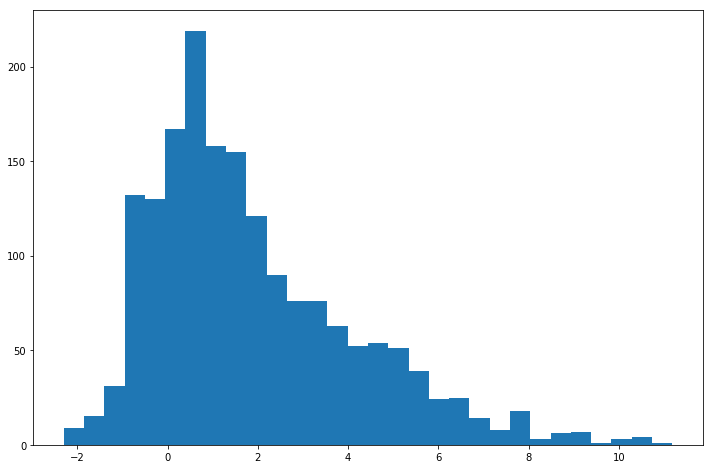

In [168]:
plt.figure(figsize=(12, 8))
plt.hist(log_IAS_brut, bins = n_bins)

<u><b>Commentaire:</b></u> Le logarithme permet de discriminer un peu plus les données et observer un plus leur diversité.

#

### 5) En utilisant signal.periodogram() (du package signal importé depuis scipy), tracez le périodogramme des données. Expliquez les pics les plus significatifs que vous observez. Attention au fait que dans la communauté signal les spectres sont normalisées pour des fréquences absolues dans [−1/2, 1/2] plutôt que [−π, −π].


In [179]:
f = 10e4

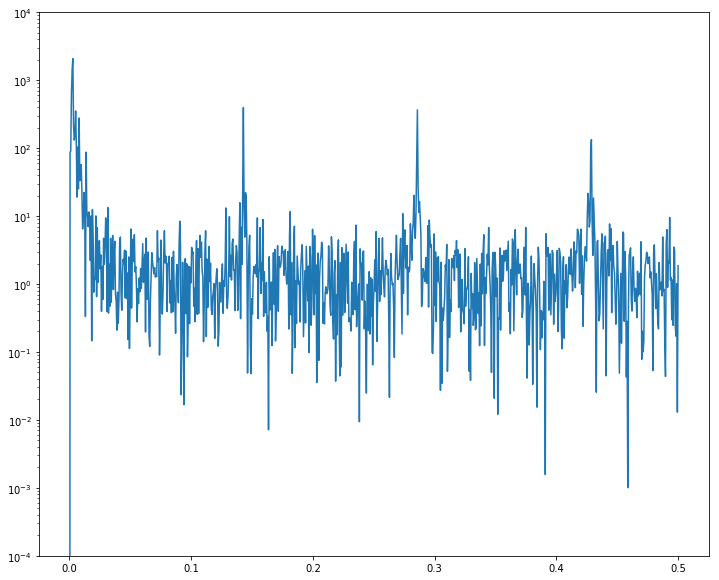

In [182]:
plt.figure(figsize=(12, 10))
f, Pxx_den = signal.periodogram(log_IAS_brut[10:])
plt.semilogy(f, Pxx_den)
plt.ylim([1e-4, 1e4])
plt.show()

<u><b>Commentaire:</b></u> On peut interpéter les pics comme les valeurs de fréquences pour lesquelles on a un signal quiu se rapproche le plus d'un Sinus. Le signal est périodique à cette fréquence là.

#

### 6) Pour supprimer une tendance périodique de période T dans un signal (xt)t∈Z il suffit d’appliquer le filtre ∆T défini par [∆T x]t = xt − xt−T Utilisez cette méthode pour supprimer la tendance périodique de période 1 an. Quel pic du périodogramme cette méthode a fait disparaître ?

In [ ]:
def delete_period_tendency(df_row):
    
    delta_time = df_row.index
    
    return  + pd.Timedelta(days=365)

In [ ]:
+ pd.Timedelta(days=1)

In [197]:
df_openhealth_data.tail()

,IAS_brut,IAS_lisse,Incidence_Sentinelles
PERIODE,,,
2014-04-13,77.9,1.8,NaN
2014-04-14,2.7,1.7,NaN
2014-04-15,1.0,1.6,NaN
2014-04-16,1.6,1.6,NaN
2014-04-17,0.4,1.6,NaN


In [195]:
for ind in df_openhealth_data['IAS_brut'].index :
    delta_time = ind - pd.Timedelta(days=365)
    
    delta_x = df_openhealth_data['IAS_brut'][ind] - df_openhealth_data['IAS_brut'][delta_time]

2008-07-01 00:00:00
2008-07-02 00:00:00
2008-07-03 00:00:00
2008-07-04 00:00:00
2008-07-05 00:00:00
2008-07-06 00:00:00
2008-07-07 00:00:00
2008-07-08 00:00:00
2008-07-09 00:00:00
2008-07-10 00:00:00
2008-07-11 00:00:00
2008-07-12 00:00:00
2008-07-13 00:00:00
2008-07-14 00:00:00
2008-07-15 00:00:00
2008-07-16 00:00:00
2008-07-17 00:00:00
2008-07-18 00:00:00
2008-07-19 00:00:00
2008-07-20 00:00:00
2008-07-21 00:00:00
2008-07-22 00:00:00
2008-07-23 00:00:00
2008-07-24 00:00:00
2008-07-25 00:00:00
2008-07-26 00:00:00
2008-07-27 00:00:00
2008-07-28 00:00:00
2008-07-29 00:00:00
2008-07-30 00:00:00
2008-07-31 00:00:00
2008-08-01 00:00:00
2008-08-02 00:00:00
2008-08-03 00:00:00
2008-08-04 00:00:00
2008-08-05 00:00:00
2008-08-06 00:00:00
2008-08-07 00:00:00
2008-08-08 00:00:00
2008-08-09 00:00:00
2008-08-10 00:00:00
2008-08-11 00:00:00
2008-08-12 00:00:00
2008-08-13 00:00:00
2008-08-14 00:00:00
2008-08-15 00:00:00
2008-08-16 00:00:00
2008-08-17 00:00:00
2008-08-18 00:00:00
2008-08-19 00:00:00
